In [2]:
# 4.1. Etapa 1: ambiente
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Verificar caminho do arquivo, se está acessível
file_path = r"C:\Users\Administrador\OneDrive - Smart Travel S.A\Área de Trabalho\Compass\Sprint 3 - Python\Desafio\googleplaystore.csv"

# Ler o arquivo CSV
data = pd.read_csv(file_path)

# Exibir as 5 primeiras linhas para entender o dataset
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# 4.2. Etapa 2: desenvolvimento
# Remover linhas duplicadas
data_cleaned = data.drop_duplicates()

# Verificar o número de linhas antes e depois
print("Antes de remover duplicatas:", len(data))
print("Depois de remover duplicatas:", len(data_cleaned))

Antes de remover duplicatas: 10841
Depois de remover duplicatas: 10358


C:\Users\Administrador\AppData\Local\Temp\ipykernel_13628\2261431800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Installs'] = data_cleaned['Installs'].astype(str)
C:\Users\Administrador\AppData\Local\Temp\ipykernel_13628\2261431800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Installs'] = (
C:\Users\Administrador\AppData\Local\Temp\ipykernel_13628\2261431800.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

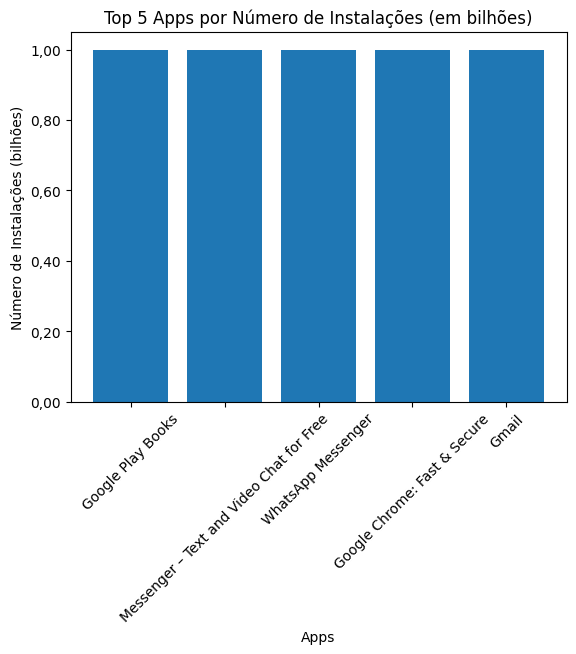

In [4]:
# 2. Faça um gráfico de barras contendo os top 5 apps por número de instalação.

# Garantir que a coluna "Installs" seja tratada como string antes de manipular
data_cleaned['Installs'] = data_cleaned['Installs'].astype(str)

# Substituir símbolos '+' e ',' na coluna "Installs"
data_cleaned['Installs'] = (
    data_cleaned['Installs']
    .str.replace('+', '', regex=False)
    .str.replace(',', '', regex=False)
)

# Converter para numérico (substituir valores inválidos por NaN)
data_cleaned['Installs'] = pd.to_numeric(data_cleaned['Installs'], errors='coerce')

# Remover linhas com NaN na coluna "Installs"
data_cleaned = data_cleaned.dropna(subset=['Installs'])

# Dividir os valores de "Installs" por 1e9 para exibir em bilhões
data_cleaned['Installs_bilhoes'] = data_cleaned['Installs'] / 1e9

# Top 5 apps por número de instalações (em bilhões)
top_5_installs = data_cleaned.nlargest(5, 'Installs')

# Gráfico de barras com formatação em bilhões
plt.bar(top_5_installs['App'], top_5_installs['Installs_bilhoes'])
plt.title("Top 5 Apps por Número de Instalações (em bilhões)")
plt.xlabel("Apps")
plt.ylabel("Número de Instalações (bilhões)")
plt.xticks(rotation=45)

# Ajustar o formato dos números no eixo Y para o formato brasileiro
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
)

plt.show()


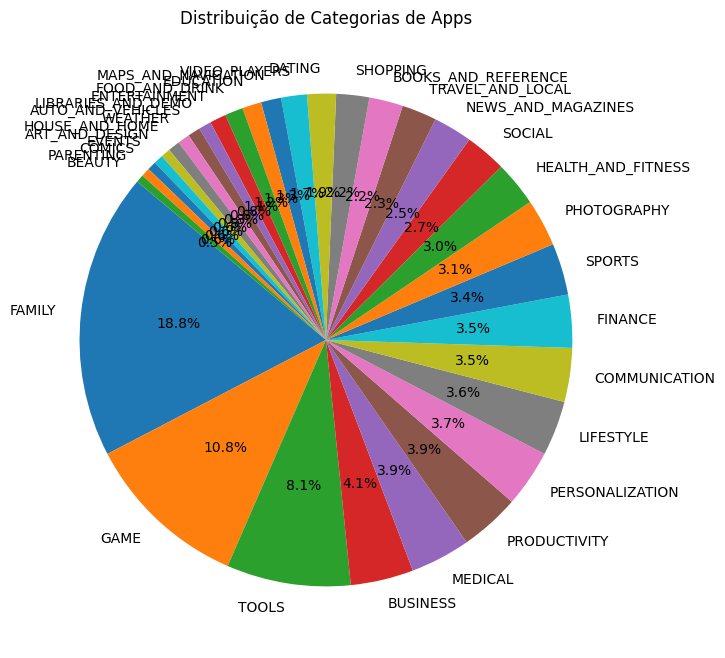

In [5]:
# 3. Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem. (Versão 1)

# Contagem de frequência de categorias
category_counts = data_cleaned['Category'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribuição de Categorias de Apps")
plt.show()

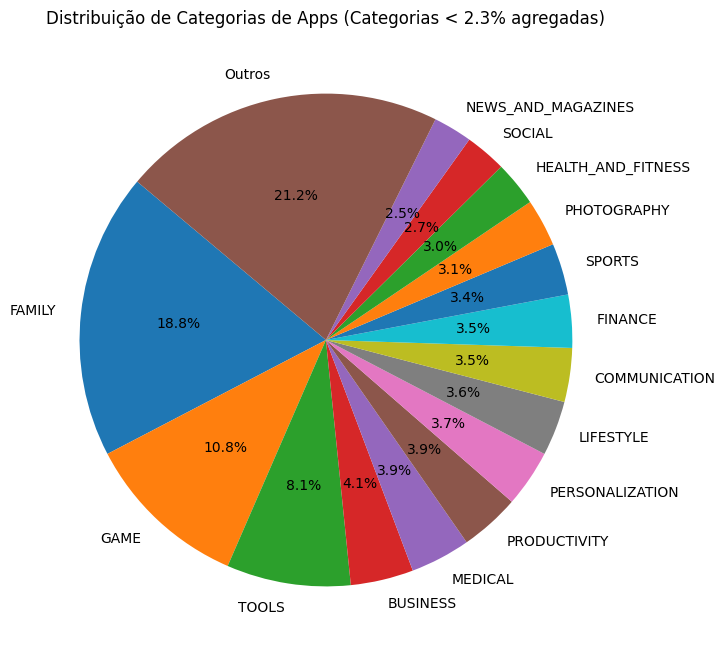

In [24]:
# 3. Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem. (Versão 2)

# VERSAO COM AS CATEGORIAS INFERIORES A 2.3% SUMARIZADAS 
# Contagem de frequência de categorias
category_counts = data_cleaned['Category'].value_counts()

# Definir um limite mínimo para categorias individuais (por exemplo, 2.3%)
limite = 0.023 * category_counts.sum()

# Separar categorias relevantes e as menos frequentes
categorias_relevantes = category_counts[category_counts >= limite]
categorias_agregadas = category_counts[category_counts < limite].sum()

# Adicionar a categoria "Outros" para as categorias menos frequentes
categorias_relevantes['Outros'] = categorias_agregadas

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    categorias_relevantes,
    labels=categorias_relevantes.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Distribuição de Categorias de Apps (Categorias < 2.3% agregadas)")
plt.show()


In [6]:
# 4. Mostre qual o app mais caro existente no dataset.

# Converter a coluna "Price" para numérico (removendo o símbolo '$')
data_cleaned['Price'] = data_cleaned['Price'].str.replace('$', '').astype(float)

# App mais caro
most_expensive_app = data_cleaned.nlargest(1, 'Price')
print("O App mais caro é:")
print(most_expensive_app[['App', 'Price']])

O App mais caro é:
                           App  Price
4367  I'm Rich - Trump Edition  400.0


In [27]:
# 5. Mostre quantos apps são classificados como 'Mature 17+'.

# Contar apps classificados como "Mature 17+"
mature_apps_count = data_cleaned[data_cleaned['Content Rating'] == 'Mature 17+'].shape[0]
print(f"Número de apps classificados como 'Mature 17+': {mature_apps_count}")

Número de apps classificados como 'Mature 17+': 447


In [7]:
# 6. Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews.

# Converter a coluna "Reviews" para numérico (substituir valores inválidos por NaN)
data_cleaned['Reviews'] = pd.to_numeric(data_cleaned['Reviews'], errors='coerce')

# Remover linhas com NaN na coluna "Reviews"
data_cleaned = data_cleaned.dropna(subset=['Reviews'])

# Top 10 apps por número de reviews
top_10_reviews = data_cleaned.nlargest(10, 'Reviews')

# Exibir resultados
print("Top 10 Apps por Número de Reviews:")
print(top_10_reviews[['App', 'Reviews']])

Top 10 Apps por Número de Reviews:
                                           App   Reviews
2544                                  Facebook  78158306
3943                                  Facebook  78128208
336                         WhatsApp Messenger  69119316
3904                        WhatsApp Messenger  69109672
2604                                 Instagram  66577446
2545                                 Instagram  66577313
3909                                 Instagram  66509917
382   Messenger – Text and Video Chat for Free  56646578
335   Messenger – Text and Video Chat for Free  56642847
1879                            Clash of Clans  44893888


In [18]:
# 7.1 Crie pelo menos mais 2 cálculos sobre o dataset e apresente um em formato de lista e outro em formato de valor. Por exemplo: "top 10 apps por número de reviews" e "o app mais caro existente no dataset."

# Média de Preço dos Apps (valor)

average_price = data_cleaned['Price'].mean()
print(f"Média de Preço dos Apps: ${average_price:.2f}")


Média de Preço dos Apps: $1.03


In [19]:
# 7.2 Crie pelo menos mais 2 cálculos sobre o dataset e apresente um em formato de lista e outro em formato de valor. Por exemplo: "top 10 apps por número de reviews" e "o app mais caro existente no dataset."

# Total de Instalações (valor)

total_installs = data_cleaned['Installs'].sum()
print(f"Total de Instalações: {total_installs:.0f}")


Total de Instalações: 146631914527


In [20]:
# 7.3 Crie pelo menos mais 2 cálculos sobre o dataset e apresente um em formato de lista e outro em formato de valor. Por exemplo: "top 10 apps por número de reviews" e "o app mais caro existente no dataset."

# top 10 apps por número de reviews (lista)

data_cleaned['Reviews'] = pd.to_numeric(data_cleaned['Reviews'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['Reviews'])

# Top 10 apps por número de reviews
top_10_reviews = data_cleaned.nlargest(10, 'Reviews')

# Criar e exibir uma lista dos apps com o número de reviews
top_10_list = top_10_reviews[['App', 'Reviews']].values.tolist()

print("Top 10 Apps por Número de Reviews:")
for app, reviews in top_10_list:
    print(f"{app}: {int(reviews)} reviews")

Top 10 Apps por Número de Reviews:
Facebook: 78158306 reviews
Facebook: 78128208 reviews
WhatsApp Messenger: 69119316 reviews
WhatsApp Messenger: 69109672 reviews
Instagram: 66577446 reviews
Instagram: 66577313 reviews
Instagram: 66509917 reviews
Messenger – Text and Video Chat for Free: 56646578 reviews
Messenger – Text and Video Chat for Free: 56642847 reviews
Clash of Clans: 44893888 reviews


In [23]:
# 7.4 Crie pelo menos mais 2 cálculos sobre o dataset e apresente um em formato de lista e outro em formato de valor. Por exemplo: "top 10 apps por número de reviews" e "o app mais caro existente no dataset."

# Top 5 App pagos baixados, listados com seu respectivo valor (lista)

# Filtrar os apps pagos (Type != 'Free')
paid_apps = data_cleaned[data_cleaned['Type'] != 'Free'].copy()  # Usar .copy() para evitar o Warning

# Garantir que a coluna "Installs" e "Price" sejam numéricas
paid_apps['Installs'] = pd.to_numeric(paid_apps['Installs'], errors='coerce')
paid_apps['Price'] = paid_apps['Price'].astype(str).str.replace('$', '', regex=False).astype(float)

# Top 5 apps pagos mais baixados
top_5_paid_apps = paid_apps.nlargest(5, 'Installs')

# Criar e exibir a lista dos apps pagos com o número de instalações e preço
top_5_paid_list = top_5_paid_apps[['App', 'Installs', 'Price']].values.tolist()

print("Top 5 Apps Pagos Mais Baixados e Seus Preços:")
for app, installs, price in top_5_paid_list:
    print(f"{app}: {int(installs)} instalações - Preço: ${price:.2f}")

Top 5 Apps Pagos Mais Baixados e Seus Preços:
Minecraft: 10000000 instalações - Preço: $6.99
Hitman Sniper: 10000000 instalações - Preço: $0.99
Minecraft: 10000000 instalações - Preço: $6.99
Card Wars - Adventure Time: 1000000 instalações - Preço: $2.99
Facetune - For Free: 1000000 instalações - Preço: $5.99


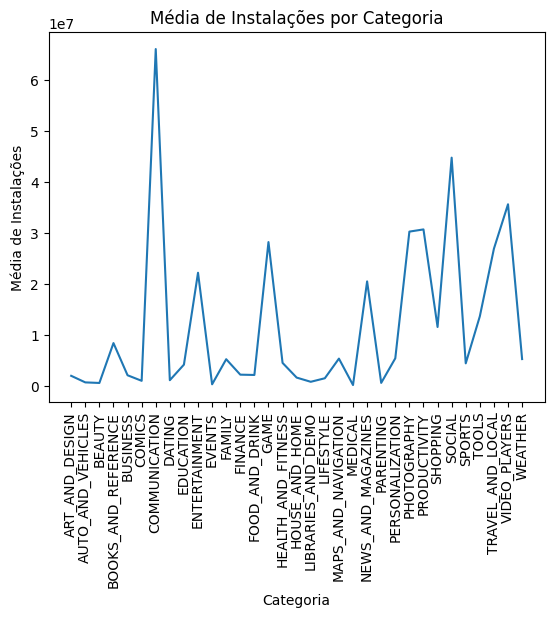

In [27]:
# 8.1 Crie pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca matplotlib. 
# Escolha tipos de gráficos diferentes dos explorados acima. Por exemplo: linhas e dispersão.

# Gráfico de Linha - Média de Instalações por Categoria

category_installs_avg = data_cleaned.groupby('Category')['Installs'].mean()
plt.plot(category_installs_avg.index, category_installs_avg.values)
plt.title("Média de Instalações por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Média de Instalações")
plt.xticks(rotation=90)
plt.show()

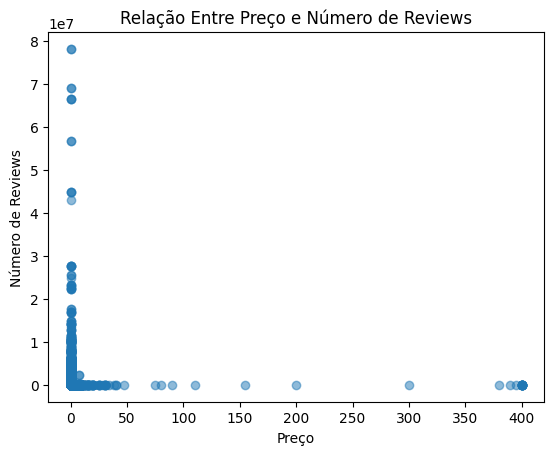

In [26]:
# 8.2 Crie pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca matplotlib. 
# Escolha tipos de gráficos diferentes dos explorados acima. Por exemplo: linhas e dispersão.

# Gráfico de Dispersão - Relação Entre Preço e Reviews

plt.scatter(data_cleaned['Price'], data_cleaned['Reviews'], alpha=0.5)
plt.title("Relação Entre Preço e Número de Reviews")
plt.xlabel("Preço")
plt.ylabel("Número de Reviews")
plt.show()